In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3),
    include_top=False,
    weights=None
)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False

# Print the model summary
#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2020-06-05 09:50:14--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  50.2MB/s    in 1.7s    

2020-06-05 09:50:16 (50.2 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 7, 7, 768)


In [0]:
from tensorflow.keras.optimizers import RMSprop
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(
    optimizer=RMSprop(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

#model.summary()

In [0]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = "/Player.zip"
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [0]:
base_dir = '/tmp/Player'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')


train_messi_dir = os.path.join(train_dir, 'Lionel Messi')
train_ronaldo_dir = os.path.join(train_dir, 'Cristiano Ronaldo')
train_dybala_dir = os.path.join(train_dir, 'Paulo Dybala')
train_aguero_dir = os.path.join(train_dir, 'Sergio Aguero')
train_romero_dir = os.path.join(train_dir, 'Sergio Romero')

validation_messi_dir = os.path.join(validation_dir, 'Lionel Messi')
validation_ronaldo_dir = os.path.join(validation_dir, 'Cristiano Ronaldo')
validation_dybala_dir = os.path.join(validation_dir, 'Paulo Dybala')
validation_aguero_dir = os.path.join(validation_dir, 'Sergio Aguero')
validation_romero_dir = os.path.join(validation_dir, 'Sergio Romero')

In [6]:
print('total training messi images :', len(os.listdir(train_messi_dir )))
print('total training ronaldo images :', len(os.listdir(train_ronaldo_dir )))

print('total validation messi images :', len(os.listdir(validation_messi_dir )))
print('total validation ronaldo images :', len(os.listdir(validation_ronaldo_dir )))

total training messi images : 15
total training ronaldo images : 15
total validation messi images : 5
total validation ronaldo images : 5


In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
   
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(5, activation='softmax')  
])

In [0]:
#model.summary()

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [31]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=1,
                                                    class_mode='categorical',
                                                    target_size=(150, 150)
                                                    )  

Found 75 images belonging to 5 classes.


In [32]:
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size= 1,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 25 images belonging to 5 classes.


In [34]:
history = model.fit_generator(
    train_generator,
    epochs= 12,
    validation_data=validation_generator
)

Epoch 1/12
75/75 [==============================] - 2s 22ms/step - loss: 0.8998 - accuracy: 0.7467 - val_loss: 1.2410 - val_accuracy: 0.6400
Epoch 2/12
75/75 [==============================] - 2s 22ms/step - loss: 0.7723 - accuracy: 0.7200 - val_loss: 1.6758 - val_accuracy: 0.5200
Epoch 3/12
75/75 [==============================] - 2s 22ms/step - loss: 0.8820 - accuracy: 0.6933 - val_loss: 1.0752 - val_accuracy: 0.6400
Epoch 4/12
75/75 [==============================] - 2s 22ms/step - loss: 0.8683 - accuracy: 0.8133 - val_loss: 1.4711 - val_accuracy: 0.4800
Epoch 5/12
75/75 [==============================] - 2s 22ms/step - loss: 0.4927 - accuracy: 0.8533 - val_loss: 1.8355 - val_accuracy: 0.6000
Epoch 6/12
75/75 [==============================] - 2s 22ms/step - loss: 0.5851 - accuracy: 0.8800 - val_loss: 1.8768 - val_accuracy: 0.6000
Epoch 7/12
75/75 [==============================] - 2s 23ms/step - loss: 0.2418 - accuracy: 0.9333 - val_loss: 2.7373 - val_accuracy: 0.5200
Epoch 8/12
75

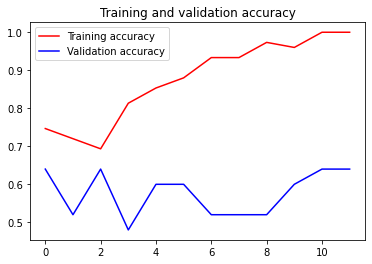

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Using TensorFlow backend.


Saving 26622.jpg to 26622 (1).jpg


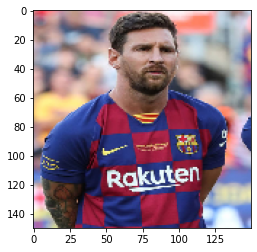

[0. 1. 0. 0. 0.]
26622.jpg is Lionel Messi


In [36]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  import matplotlib.pyplot as plt
  plt.imshow(img)
  plt.show()
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])

  if classes[0][0]==1:
    print(fn + " is Cristiano Ronaldo")
    
  elif classes[0][1]==1:
    print(fn + " is Lionel Messi")
  elif classes[0][2]==1:
    print(fn + " is Paulo Dybala")
  elif classes[0][3]==1:
    print(fn + " is Sergio Aguero")
  elif classes[0][4]==1:
    print(fn + " is Sergio Romero")